## To identify the Terrorist Organization based on the Terrorism Incident Info.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score
SEED = 42
np.random.seed(SEED)
import time

### Loading the Data
Loading Global Terrorism Dataset from CSV file

In [2]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

### Step 1: Data Preparation

#### Pick relevant features

In [3]:
#pick features for Baseline Model
baseline_features = ['latitude','longitude','success','suicide','attacktype1','targtype1','claimed','nkill','nkillus','nkillter','nwound','nwoundus','ishostkid']

In [4]:
df_bl[baseline_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     12295 non-null  float64
 1   longitude    12295 non-null  float64
 2   success      12295 non-null  int64  
 3   suicide      12295 non-null  int64  
 4   attacktype1  12295 non-null  int64  
 5   targtype1    12295 non-null  int64  
 6   claimed      12295 non-null  int64  
 7   nkill        12295 non-null  int64  
 8   nkillus      12295 non-null  int64  
 9   nkillter     12295 non-null  int64  
 10  nwound       12295 non-null  int64  
 11  nwoundus     12295 non-null  int64  
 12  ishostkid    12295 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


#### Map Labels

In [5]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

#### Check NA

In [6]:
#check for null cells
print(df_bl[baseline_features].isna().any().any())
df_bl[baseline_features].isna().any()

False


latitude       False
longitude      False
success        False
suicide        False
attacktype1    False
targtype1      False
claimed        False
nkill          False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
ishostkid      False
dtype: bool

#### One-Hot Encoding for feature attacktype1,targtype1

In [7]:
df_bl_one_hot = df_bl[baseline_features]

In [8]:
#one hot encoding for column attacktype1,targtype1
df_bl_one_hot = pd.get_dummies(df_bl_one_hot, columns = ['attacktype1','targtype1'])

In [9]:
df_bl_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12295 non-null  float64
 1   longitude      12295 non-null  float64
 2   success        12295 non-null  int64  
 3   suicide        12295 non-null  int64  
 4   claimed        12295 non-null  int64  
 5   nkill          12295 non-null  int64  
 6   nkillus        12295 non-null  int64  
 7   nkillter       12295 non-null  int64  
 8   nwound         12295 non-null  int64  
 9   nwoundus       12295 non-null  int64  
 10  ishostkid      12295 non-null  int64  
 11  attacktype1_1  12295 non-null  uint8  
 12  attacktype1_2  12295 non-null  uint8  
 13  attacktype1_3  12295 non-null  uint8  
 14  attacktype1_4  12295 non-null  uint8  
 15  attacktype1_5  12295 non-null  uint8  
 16  attacktype1_6  12295 non-null  uint8  
 17  attacktype1_7  12295 non-null  uint8  
 18  attack

### Step 2: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [10]:
# 1)

X = df_bl_one_hot # input
y = df_bl['gname'] # output (dependent variable)

In [11]:
# 2) Splitting our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

#### Normalize the Data

Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [12]:
from sklearn.preprocessing import StandardScaler
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 3: Training & Fine-tuning the model

classifier_01:DecisionTreeClassifier()<br>
classifier_011:DecisionTreeClassifier(),Grid Search to fine tune the hyperparameter<br>
classifier_02:RandomForestClassifier()<br>
classifier_021:RandomForestClassifier(),Grid Search to fine tune the hyperparameter<br>
classifier_022:RandomForestClassifier(),Grid Search to fine tune the hyperparameter<br>

In [42]:
classifier_01 = DecisionTreeClassifier()
# Train the model
classifier_01.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
classifier_01.tree_.max_depth

35

In [44]:
# Visualize the tree
from sklearn import tree

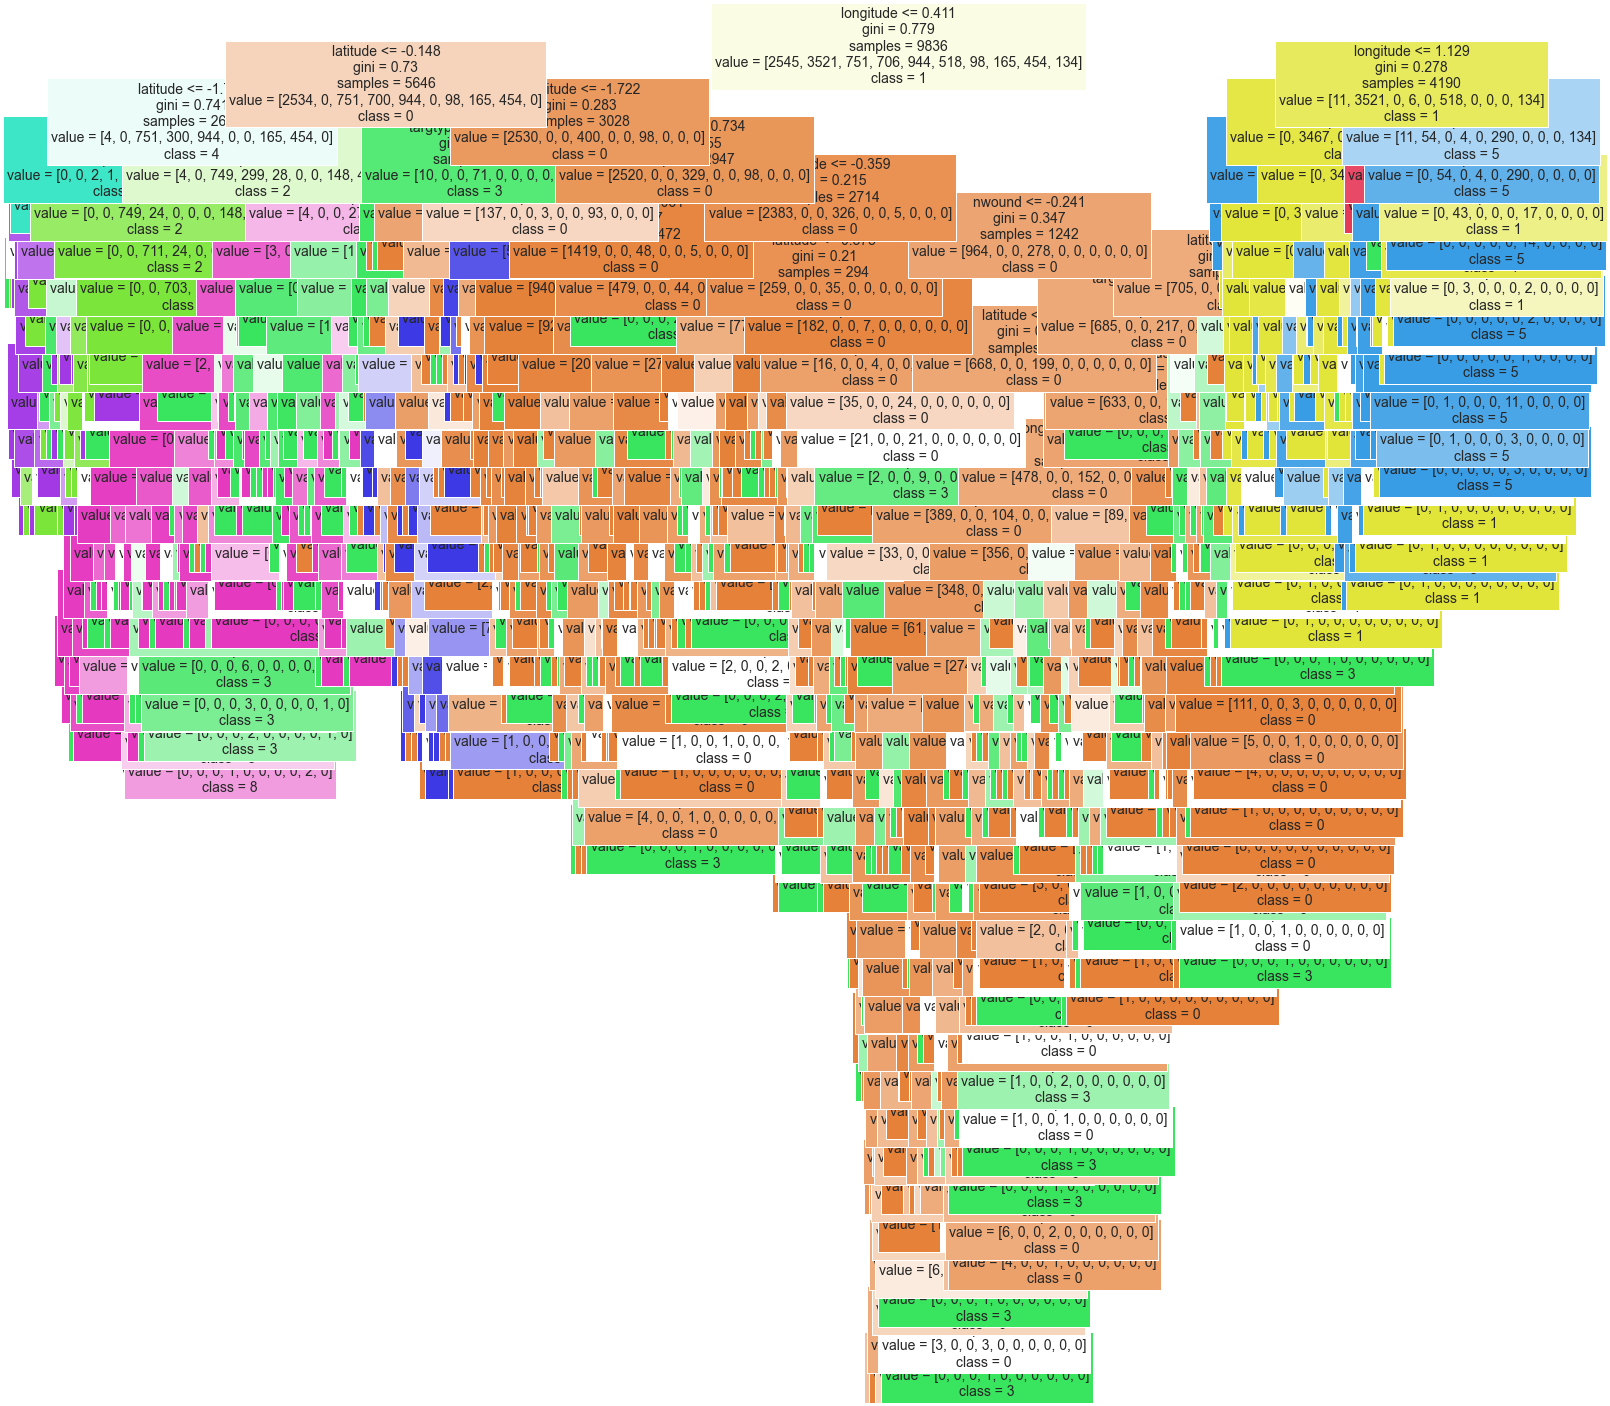

In [46]:
plt.figure(figsize=(25,25))
dtree_plot = tree.plot_tree(classifier_01,
                           feature_names = df_bl_one_hot.columns,
                           class_names = ['0','1','2','3','4','5','6','7','8','9'],
                           filled = True,
                           fontsize = 14)
plt.show()

In [51]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV
start = time.time()
classifier_011 = DecisionTreeClassifier(random_state=SEED)
param_grid_011 = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1,20),
              'min_samples_split': range(1, 20),
              'min_samples_leaf': range(1, 10)}

gs_clf_011 = GridSearchCV(classifier_011,
                      param_grid_011, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_011.fit(X_train, y_train)
stop = time.time()
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_011.best_params_, gs_clf_011.best_score_))
print(f"Training time: {stop - start}s")

'{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 9}' gives the best F1-score at: 89.38%
Training time: 270.74595975875854s
Wall time: 4min 30s


In [52]:
# These are the best parameters for the decision tree classifier
gs_clf_011.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=9,
                       random_state=42)

In [53]:
# Training the final model using the best parameters from above fine-tuning
classifier_011 = gs_clf_011.best_estimator_
classifier_011.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=9,
                       random_state=42)

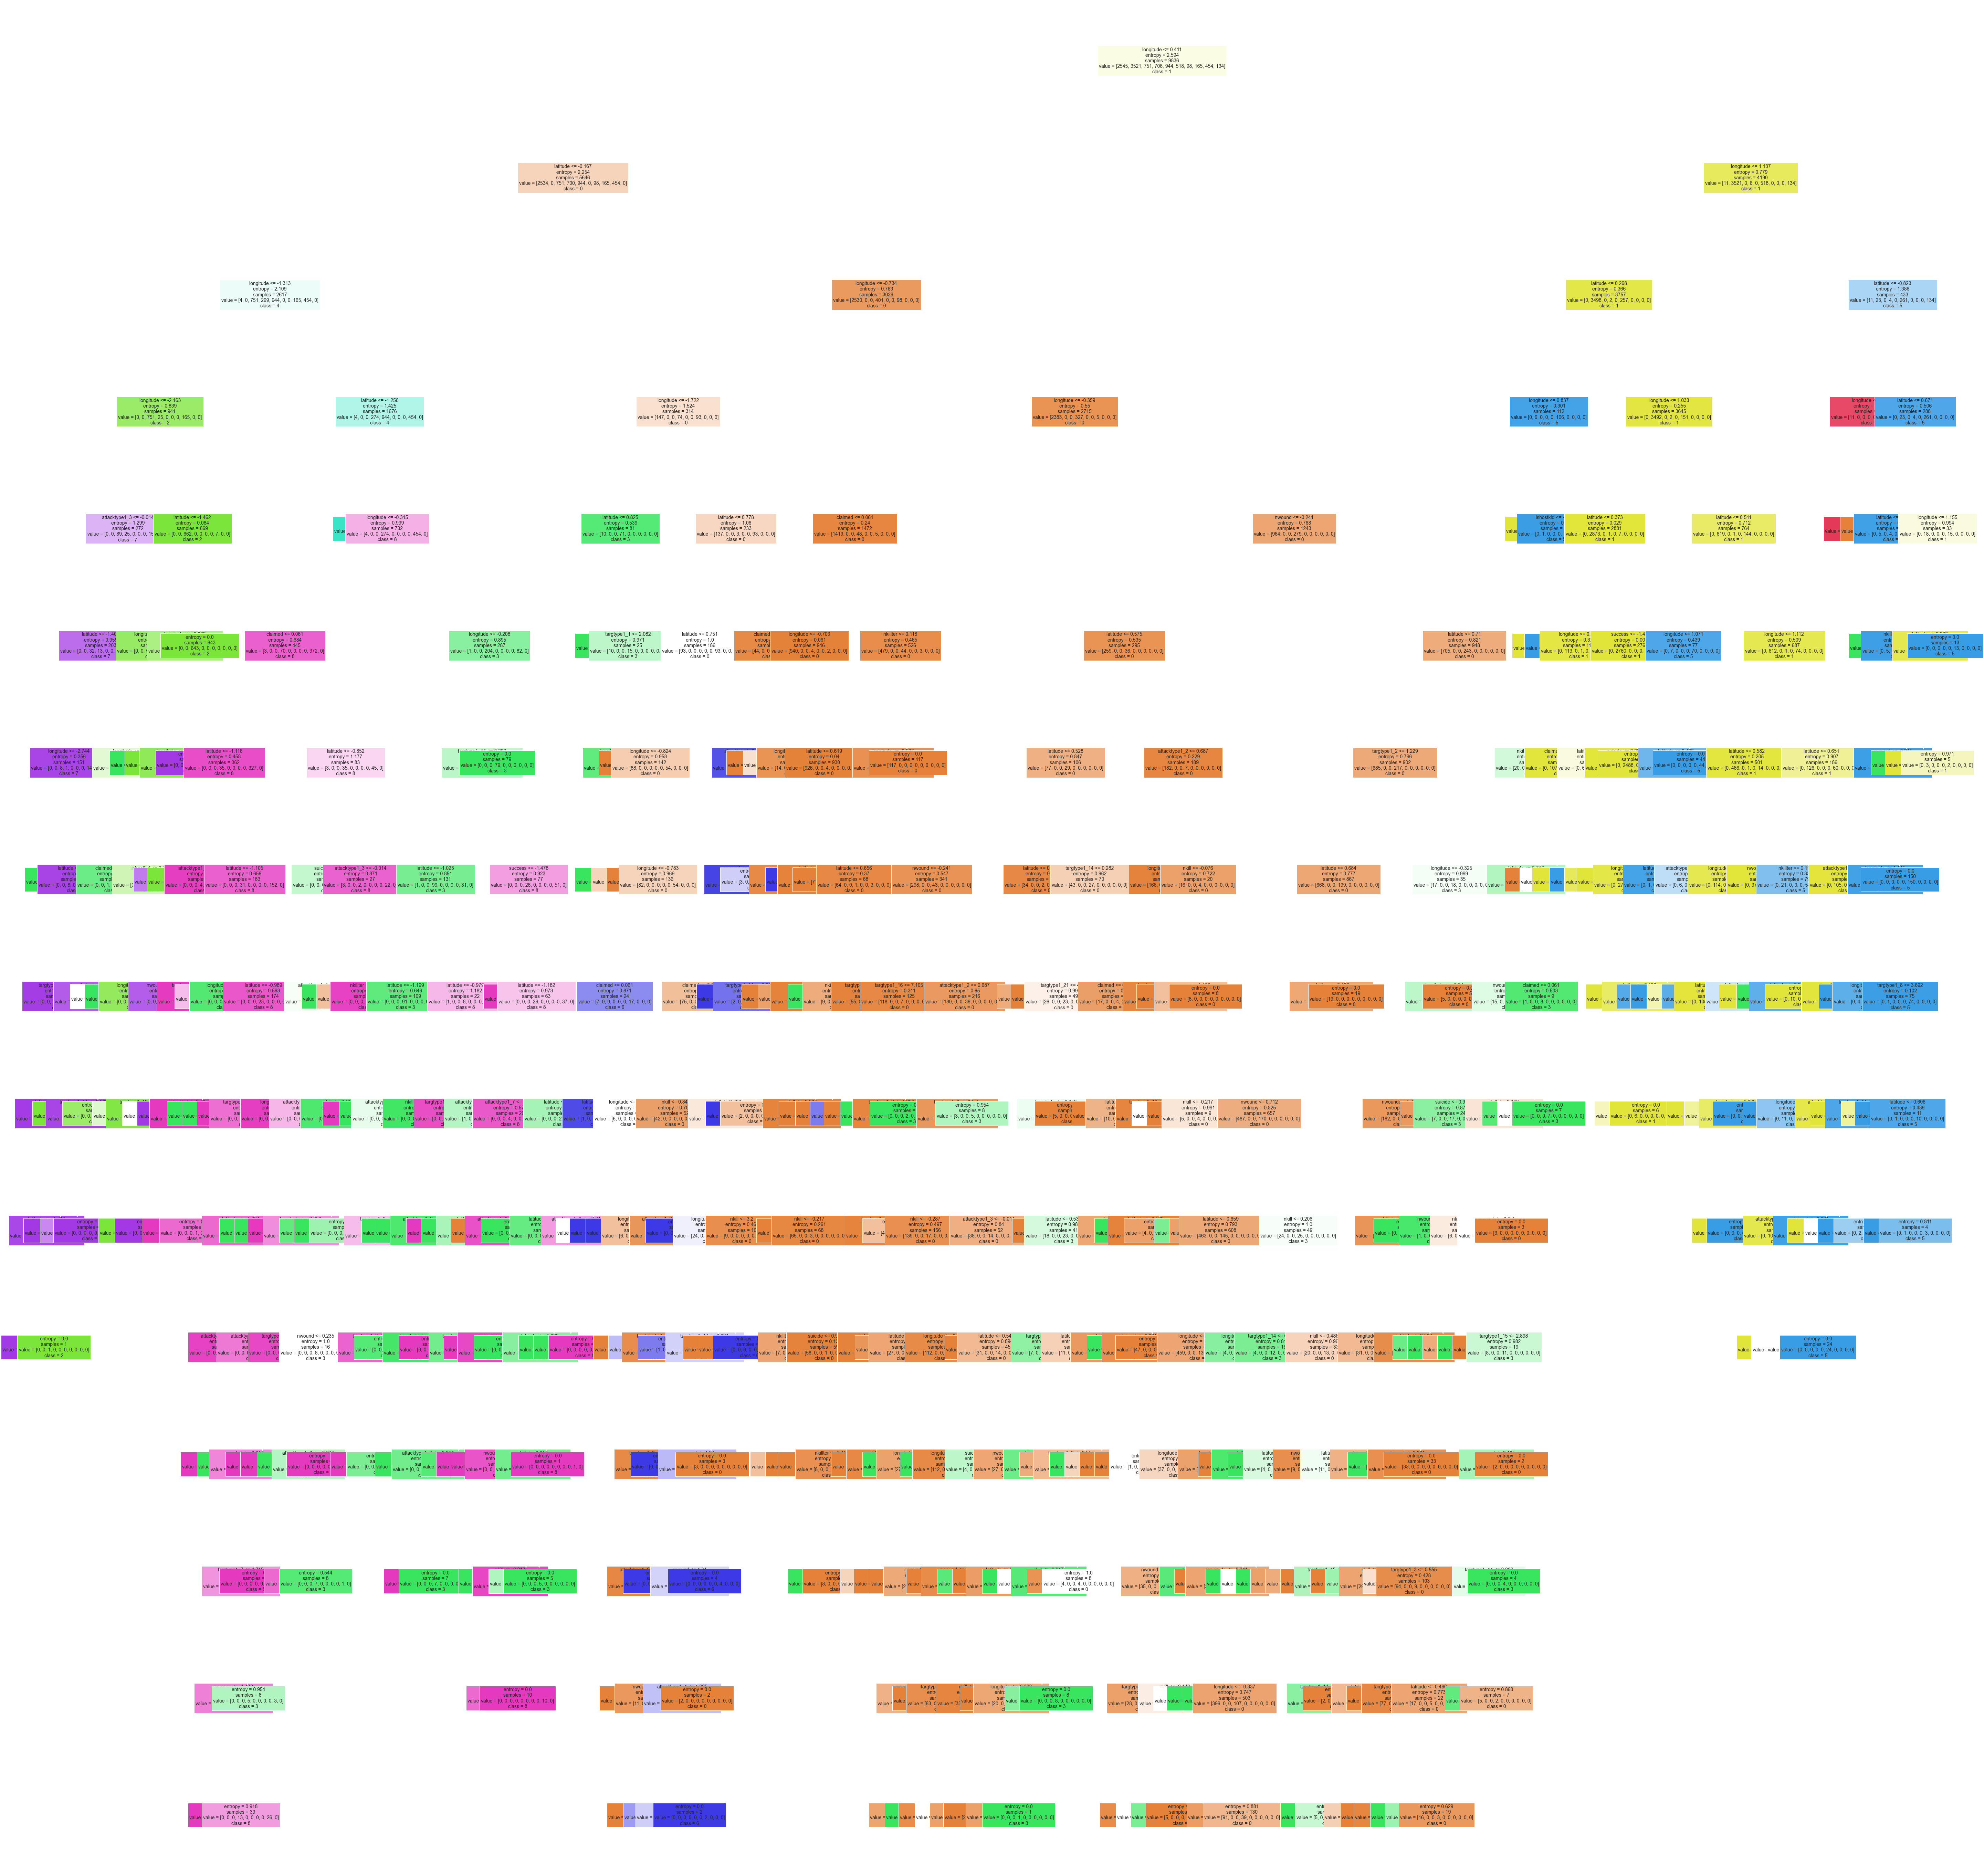

Wall time: 34.7 s


In [55]:
# Visualize the tree
%%time
plt.figure(figsize=(100,100))
dtree_plot_011 = tree.plot_tree(classifier_011,
                           feature_names = df_bl_one_hot.columns,
                           class_names = ['0','1','2','3','4','5','6','7','8','9'],
                           filled = True,
                           fontsize = 14)
plt.show()

In [59]:
classifier_02 = RandomForestClassifier()
classifier_02.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
classifier_021 = RandomForestClassifier()
param_grid_021 = {'n_estimators': [100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy'],
              'max_depth': range(20,30),
              'min_samples_split': [1, 5]}


gs_clf_021 = GridSearchCV(classifier_021,
                      param_grid_021, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_021.fit(X_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_021.best_params_, gs_clf_021.best_score_))

'{'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 100}' gives the best F1-score at: 86.99%
Wall time: 6min 5s


In [71]:
# Training the final model using the best parameters from above fine-tuning
classifier_021 = gs_clf_021.best_estimator_
classifier_021.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5)

In [40]:
classifier_022 = RandomForestClassifier(criterion = 'gini', max_depth= 27, min_samples_split=5, n_estimators=500)
classifier_022.fit(X_train, y_train)

RandomForestClassifier(max_depth=27, min_samples_split=5, n_estimators=500)

### Step 4: Testing the model

In [47]:
# Kept aside some data to test - X_test
y_pred_01 = classifier_01.predict(X_test)

compare_df_01 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_01})

In [48]:
compare_df_01.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6582,0,0
5906,1,1
3321,3,3
1698,1,1
11913,0,0
220,1,1
11190,0,0
786,5,5
3601,1,1
10789,1,1


In [56]:
# Kept aside some data to test - X_test
y_pred_011 = classifier_011.predict(X_test)

compare_df_011 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_011})

In [57]:
compare_df_011.sample(20)

,Desired Output (Actuals),Predicted_01 Output
5229,1,1
11515,0,0
2397,1,1
2353,1,1
6422,1,1
3102,3,3
3601,1,1
9242,0,0
289,9,9
4693,6,6


In [60]:
# Kept aside some data to test - X_test
y_pred_02 = classifier_02.predict(X_test)

compare_df_02 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_02})

In [61]:
compare_df_02.sample(20)

,Desired Output (Actuals),Predicted_01 Output
11406,0,0
106,1,1
2316,1,1
3329,1,1
5784,0,0
7812,0,0
5577,2,2
1645,1,1
9650,4,4
6505,2,2


In [81]:
# Kept aside some data to test - X_test
y_pred_021 = classifier_021.predict(X_test)

compare_df_021 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_021})

In [82]:
compare_df_021.sample(20)

,Desired Output (Actuals),Predicted_01 Output
5906,1,1
6564,0,0
3158,3,3
1228,4,4
7648,1,1
6051,4,4
2281,1,1
8460,0,0
7123,1,1
3102,3,3


In [41]:
# Kept aside some data to test - X_test
y_pred_022 = classifier_022.predict(X_test)

compare_df_022 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_022})

In [42]:
compare_df_022.sample(20)

,Desired Output (Actuals),Predicted_01 Output
718,9,9
3184,0,0
9973,8,8
9327,0,0
12157,0,0
1344,2,2
2818,1,1
10511,0,0
2288,5,5
4861,0,0


### Step 5: Evaluate the model

In [49]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_01))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       637
           1       1.00      0.99      0.99       880
           2       0.99      0.99      0.99       188
           3       0.61      0.64      0.63       177
           4       1.00      1.00      1.00       236
           5       0.94      0.96      0.95       130
           6       0.65      0.62      0.64        24
           7       0.95      0.98      0.96        41
           8       0.90      0.93      0.91       113
           9       1.00      1.00      1.00        33

    accuracy                           0.93      2459
   macro avg       0.89      0.90      0.90      2459
weighted avg       0.93      0.93      0.93      2459




In [58]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_011))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       637
           1       0.99      0.99      0.99       880
           2       0.99      1.00      0.99       188
           3       0.78      0.56      0.65       177
           4       1.00      1.00      1.00       236
           5       0.95      0.94      0.94       130
           6       0.58      0.75      0.65        24
           7       1.00      0.98      0.99        41
           8       0.89      0.96      0.92       113
           9       1.00      1.00      1.00        33

    accuracy                           0.94      2459
   macro avg       0.91      0.91      0.91      2459
weighted avg       0.94      0.94      0.94      2459




In [75]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_02))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       637
           1       0.98      0.99      0.99       880
           2       0.98      1.00      0.99       188
           3       0.76      0.59      0.66       177
           4       1.00      0.98      0.99       236
           5       0.96      0.86      0.91       130
           6       0.75      0.50      0.60        24
           7       0.98      0.98      0.98        41
           8       0.89      0.95      0.92       113
           9       0.97      1.00      0.99        33

    accuracy                           0.94      2459
   macro avg       0.92      0.88      0.89      2459
weighted avg       0.94      0.94      0.94      2459




In [74]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_021))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       637
           1       0.98      0.99      0.99       880
           2       0.98      1.00      0.99       188
           3       0.82      0.53      0.64       177
           4       1.00      0.99      0.99       236
           5       0.95      0.85      0.90       130
           6       0.72      0.54      0.62        24
           7       0.97      0.95      0.96        41
           8       0.89      0.96      0.92       113
           9       0.94      1.00      0.97        33

    accuracy                           0.94      2459
   macro avg       0.91      0.88      0.89      2459
weighted avg       0.94      0.94      0.93      2459




In [43]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_022))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       637
           1       0.98      0.99      0.99       880
           2       0.98      1.00      0.99       188
           3       0.84      0.56      0.67       177
           4       1.00      0.99      0.99       236
           5       0.96      0.85      0.90       130
           6       0.71      0.42      0.53        24
           7       0.97      0.95      0.96        41
           8       0.91      0.96      0.93       113
           9       0.94      1.00      0.97        33

    accuracy                           0.94      2459
   macro avg       0.92      0.87      0.89      2459
weighted avg       0.94      0.94      0.94      2459




In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob_022 = classifier_022.predict_proba(X_test)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_022, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_022, multi_class="ovr",
                                     average="weighted")

In [53]:
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-Rest ROC AUC scores:
0.994449 (macro),
0.994525 (weighted by prevalence)


In [44]:
# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_022)

Confusion Matrix:


array([[618,   1,   0,  12,   1,   0,   3,   0,   0,   2],
       [  0, 875,   0,   0,   0,   5,   0,   0,   0,   0],
       [  0,   0, 188,   0,   0,   0,   0,   0,   0,   0],
       [ 62,   1,   2,  99,   0,   0,   1,   1,  11,   0],
       [  0,   0,   0,   2, 234,   0,   0,   0,   0,   0],
       [  1,  19,   0,   0,   0, 110,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,  10,   0,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,  39,   0,   0],
       [  0,   0,   0,   5,   0,   0,   0,   0, 108,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  33]], dtype=int64)

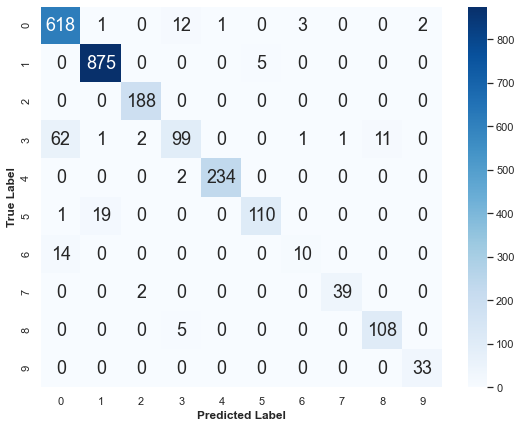

In [45]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_022), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,fmt='g')
#                 ),xticklabels=class_names, yticklabels=class_names
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')